## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
source_df = pd.merge(mouse_metadata,study_results, how = 'outer', on = 'Mouse ID')

# Display the data table for preview
source_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = len(source_df['Mouse ID'].unique())
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = source_df[source_df.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
duplicate_mice_df = duplicate_mice_df.set_index('Mouse ID')
duplicate_mice_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [62]:
# Optional: Get all the data for the duplicate mouse ID. 



In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_source_df = source_df.set_index('Mouse ID')
clean_source_df = clean_source_df.drop(duplicate_mice_df.index)
clean_source_df.reset_index(inplace=True)
clean_source_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = len(clean_source_df['Mouse ID'].unique())
clean_num_mice

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_drug_grouped = clean_source_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_drug_grouped = clean_source_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_drug_grouped = clean_source_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev_drug_grouped = clean_source_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM_drug_grouped = clean_source_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_grouped_df = pd.DataFrame({"Mean": mean_drug_grouped,
                                  "Median": median_drug_grouped,
                                  "Variance": var_drug_grouped,
                                  "Standard Deviation": stdev_drug_grouped,
                                  "Standard Error of the Mean": SEM_drug_grouped})
summary_grouped_df

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = clean_source_df.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var','std', 'sem'])
summary_agg_df.rename(columns  = {"mean":"Mean", "median":"Median", 
                                  "var": "Variance", "std":"Standard Deviation",
                                 "sem": "Standard Error of the Mean"}, inplace = True)
summary_agg_df.columns = summary_agg_df.columns.droplevel()
summary_agg_df

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_records = clean_source_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].count()

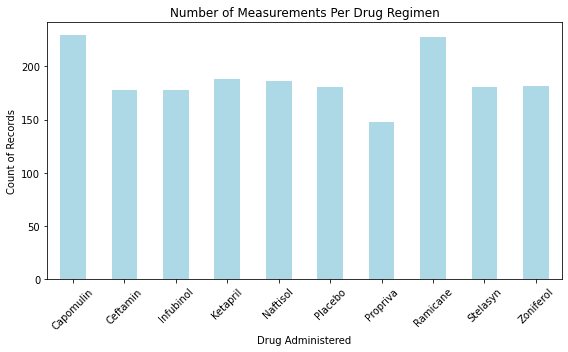

In [188]:
total_records.plot(kind="bar", color = 'lightblue', figsize=(8,5), width = 0.5, rot=45, title = "Number of Measurements Per Drug Regimen")
plt.xlabel("Drug Administered")
plt.ylabel("Count of Records")
plt.tight_layout()
plt.savefig("Analysis/BarPandas.png")
plt.show()

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
total_measurements_df = clean_source_df.groupby('Drug Regimen')[['Tumor Volume (mm3)']].count()
total_measurements_df.reset_index(inplace=True)
total_measurements_df.rename(columns = {"Tumor Volume (mm3)": "Number of Measurements"}, inplace = True)
total_measurements_df

,Drug Regimen,Number of Measurements
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


In [11]:
x_axis = np.arange(len(total_measurements_df))
tick_locations = [value for value in x_axis]

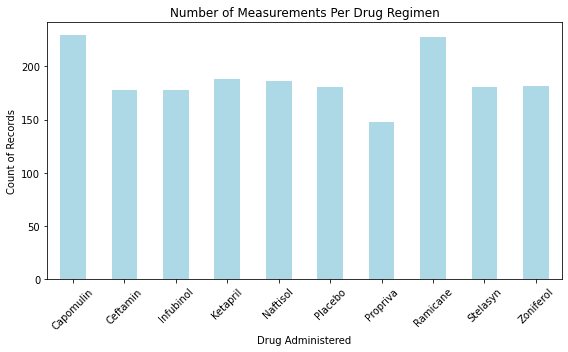

In [12]:
plt.figure(figsize=(8,5))
plt.bar(x_axis, total_measurements_df['Number of Measurements'], color="lightblue", align="center", width = 0.5)
plt.xticks(tick_locations, total_measurements_df['Drug Regimen'], rotation = 45)
plt.xlim(-0.5, len(x_axis)-0.5)

plt.title("Number of Measurements Per Drug Regimen")
plt.xlabel("Drug Administered")
plt.ylabel("Count of Records")

plt.tight_layout()
plt.savefig("Analysis/BarPyplot.png")
plt.show()

In [217]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_df = clean_source_df.groupby('Sex')[['Mouse ID']].count()
mice_gender_df.rename(columns={'Mouse ID':'Count by Sex'}, inplace=True)

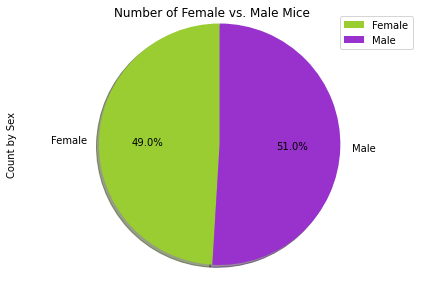

In [218]:
colors = ["yellowgreen", "darkorchid"]
mice_gender_df.plot(kind='pie', subplots=True, shadow = True, startangle=90, autopct='%1.1f%%', colors = colors, title = "Number of Female vs. Male Mice")
plt.axis("equal")
plt.tight_layout()
plt.savefig("Analysis/PiePandas.png")
plt.show()

In [219]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
updated_gender_df = mice_gender_df.reset_index()
labels = updated_gender_df['Sex']
count = updated_gender_df['Count by Sex']

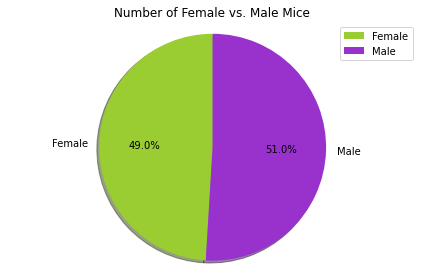

In [220]:
plt.pie(count, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Number of Female vs. Male Mice")
plt.axis("equal")
plt.legend(labels, loc = "best")
plt.tight_layout()
plt.savefig("Analysis/PiePyplot.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
